In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.metrics import silhouette_score 
from sklearn.manifold import TSNE

%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


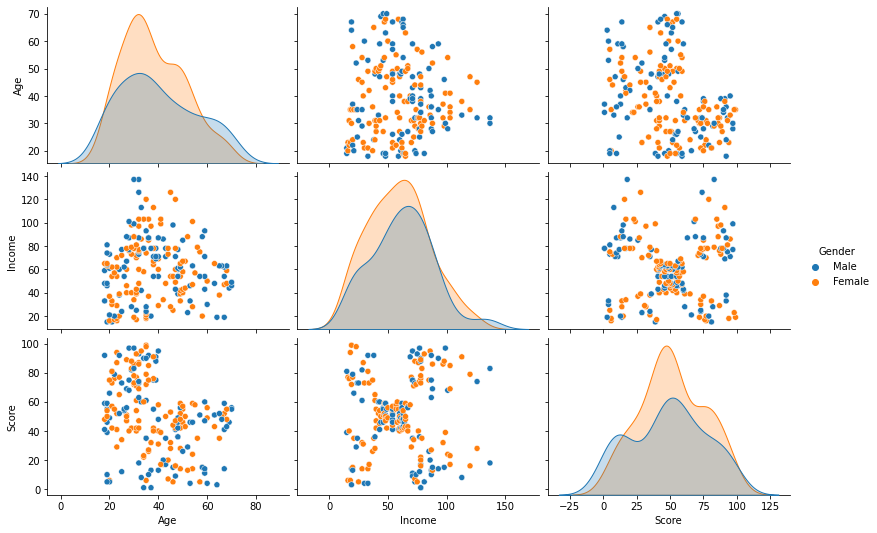

In [ ]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [ ]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
# X = (X - X.mean(axis=0))/ X.std() #стандартизация

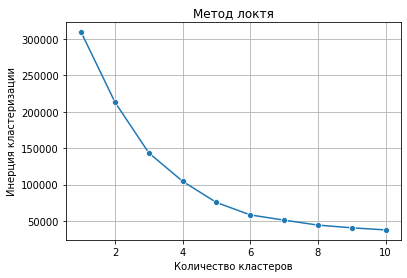

In [ ]:
n_inertia = [] # инерция показывает насколько хорошо кластеризация получилась
#(качество отделения кластеров, маленькое расстояние внутри кластеров,большое расстояние между калстерами)
# чем больше инерция,тем хуже сформирован кластер

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    n_inertia.append(km.inertia_)
    
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, 11), y=n_inertia, ax=ax,  marker='o')
ax.set_title('Метод локтя')
ax.set_xlabel('Количество кластеров')
ax.set_ylabel('Инерция кластеризации')
plt.grid()
plt.show()


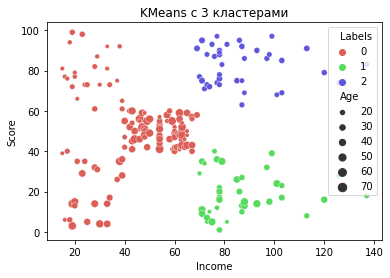

CPU times: user 408 ms, sys: 5.85 ms, total: 414 ms
Wall time: 395 ms


In [ ]:
%%time
km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'], palette=sns.color_palette('hls', 3))

plt.title('KMeans c 3 кластерами')
plt.show()

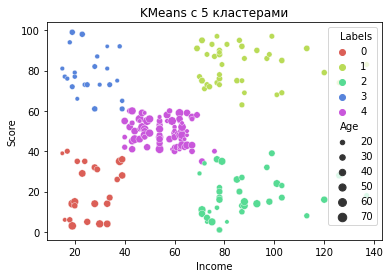

CPU times: user 678 ms, sys: 4.5 ms, total: 683 ms
Wall time: 912 ms


In [ ]:
%%time
km5 = KMeans(n_clusters=5).fit(X.drop(['Labels'], axis=1))
X['Labels'] = km5.labels_

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'], palette=sns.color_palette('hls', 5))

plt.title('KMeans c 5 кластерами')
plt.show()

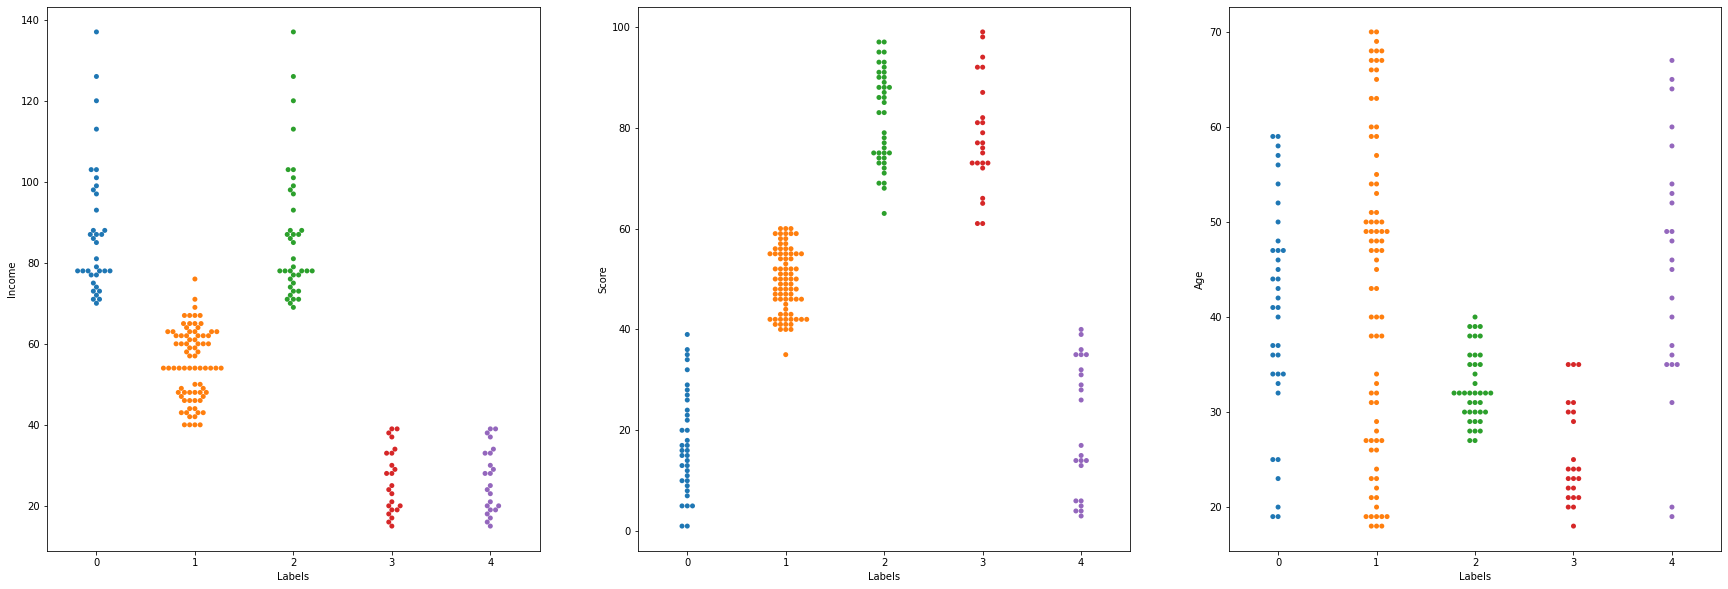

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)

ax = fig.add_subplot(132)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)

ax = fig.add_subplot(133)
sns.swarmplot(x='Labels', y='Age', data=X, ax=ax)

plt.show()

In [ ]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))
# (b-a) / max(b, a)
# b - расстояние между экземпляром и кластером
# a - среднее расстояние между объектами в кластере
# чем ближе к 1, тем лучше, чем ближе к -1, тем хуже

Silhouette score: 0.44428597560893024


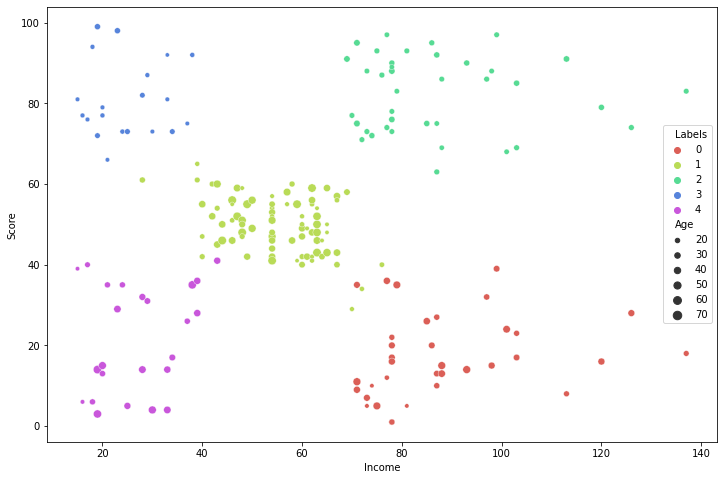

CPU times: user 292 ms, sys: 6.57 ms, total: 299 ms
Wall time: 299 ms


In [ ]:
%%time
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X.drop(['Labels'], axis=1)) # ward, complete...
# linkage - как расчитывается расстояние между экземплярами 
X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'],
                palette=sns.color_palette('hls', 5))
plt.show()

In [ ]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.43542057757306424


In [ ]:
dist = distance_matrix(X.drop(['Labels'], axis=1), X.drop(['Labels'], axis=1))
print(dist)
# считает расстояние между каждым объектом

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


In [ ]:
hierarchy_clustering = hierarchy.linkage(dist, 'average')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


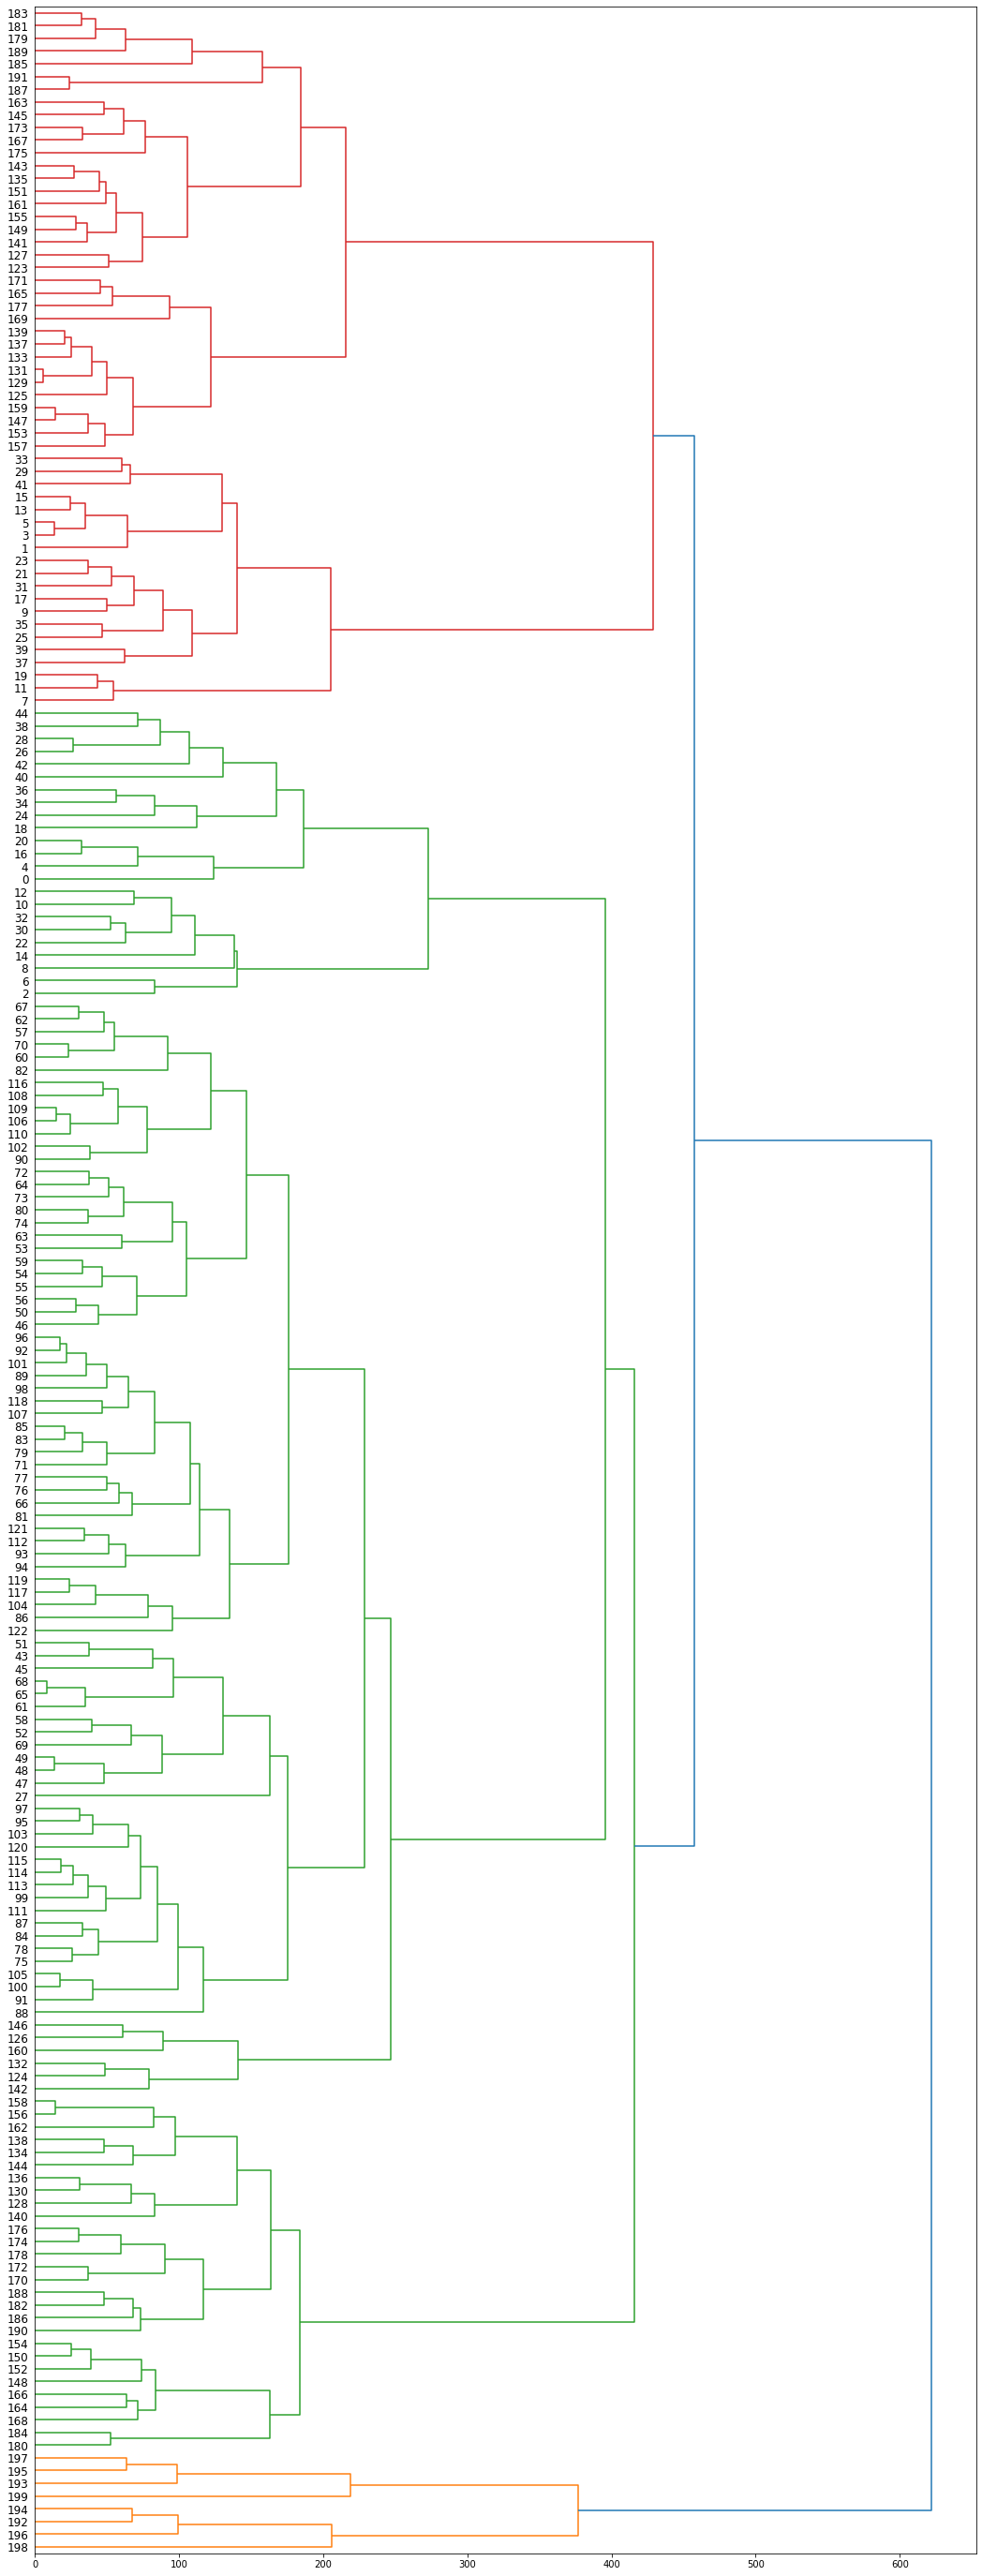

In [ ]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(hierarchy_clustering, leaf_font_size=12, orientation='right')

## DBSCAN


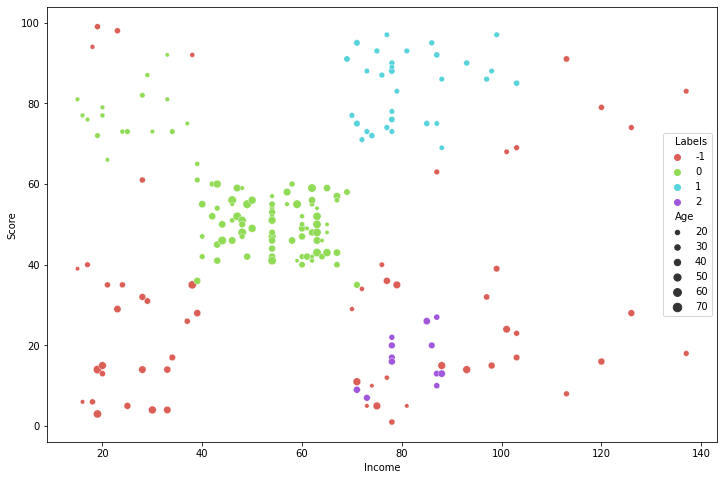

CPU times: user 274 ms, sys: 2.72 ms, total: 277 ms
Wall time: 278 ms


In [ ]:
# берёт отдельные экземпляры и пытается их объединить, центры кластеров 
# обзазуют те экземпляры, вокруг которых есть n точек, если 2 центра кластеров слишком близко друг к другу, то они объединяются
# хорошо работает, если большая плотность точек, много экземплятор, растояния между кластерами большие
%%time
db = DBSCAN(eps=12, min_samples=6).fit(X.drop(['Labels'], axis=1))
# min_samples - сколько точек должно быть рядом с точкой,чтобы её считать центром кластера
# eps - растояние между точками, если раст > eps, то не можем объединить в кластер
X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.show()


In [ ]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.1806368944323813


In [ ]:
table = pd.DataFrame([395,299,277], index = ["k-means", "AgglomerativeClustering", "DBSCAN"] )
table

,0
k-means,395
AgglomerativeClustering,299
DBSCAN,277


In [ ]:
D = df.drop(['CustomerID', 'Gender'],axis = 1)
D.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
T = TSNE(n_components = 2, perplexity = 25, random_state = 123)

In [ ]:
TSNE_features = T.fit_transform(D)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
TSNE_features[1:4,:]

array([[ -6.7631435,  -6.5590053],
       [-13.213293 ,   1.9284569],
       [ -6.9847627,  -6.0620365]], dtype=float32)

In [ ]:
DATA = D.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]

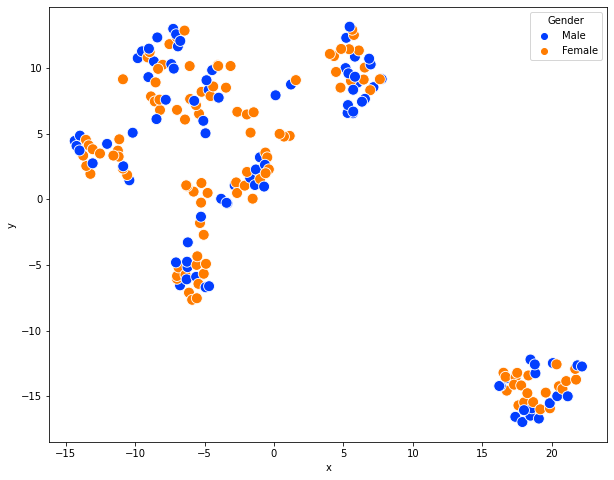

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=DATA['x'], y=DATA['y'],
                hue=df['Gender'], data=df,
                ax=ax, s=120, palette='bright')
plt.show()